# Геодезические линии

Геодезические линии — это обобщение понятия прямой линии на изогнутых поверхностях. Если представить себе сферы и картографические карты, на которых мы рисуем прямые линии, то геодезические линии будут теми линиями, которые отображают самое короткое расстояние между двумя точками на таких поверхностях.

### Сферы применения

1. **Навигация:** Как корабли и самолеты прокладывают оптимальные маршруты.
2. **География и картография:** Создание точных карт, где расстояния и направления корректно отображены.
3. **Геодезия:** Изучение и измерение земных поверхностей.
4. **Компьютерная графика:** Создание реалистичных 3D моделей и анимаций на изогнутых поверхностях.
5. **Физика:** Исследование свойств пространства-времени в общей теории относительности, где линии движения свободных частиц в гравитационных полях определяются как геодезические линии.

In [1]:
using Pkg
Pkg.add(["Plots", "LinearAlgebra"], io=devnull)

In [2]:
using Plots
using LinearAlgebra

In [3]:
# Задаем радиус сферы и точки на сфере
r = 1.0
θ1, ϕ1 = π / 4, 0
θ2, ϕ2 = 7π / 2, -7π / 3

(10.995574287564276, -7.330382858376184)

In [4]:
# Преобразование сферических координат в декартовы координаты
function spherical_to_cartesian(θ, ϕ, r)
    x = r * sin(θ) * cos(ϕ)
    y = r * sin(θ) * sin(ϕ)
    z = r * cos(θ)
    return [x, y, z] / norm([x, y, z]) # Нормализуем точки (должны лежать на сфере)
end

spherical_to_cartesian (generic function with 1 method)

In [5]:
# Вычисляем декартовы координаты этих точек
point1 = spherical_to_cartesian(θ1, ϕ1, r)
point2 = spherical_to_cartesian(θ2, ϕ2, r)

3-element Vector{Float64}:
 -0.5000000000000006
  0.8660254037844384
 -4.286263797015736e-16

In [6]:
# Используем линейную интерполяцию между точками, чтобы получить точки на дуге большого круга
n_points = 100
t = LinRange(0, 1, n_points)
arc_points = [(1 - τ) * point1 + τ * point2 for τ in t]

# Нормализуем точки дуги большого круга, чтобы они лежали на сфере
arc_points = [p / norm(p) for p in arc_points]

# Разбиваем на компоненты для построения графика
x = [p[1] for p in arc_points]
y = [p[2] for p in arc_points]
z = [p[3] for p in arc_points]

100-element Vector{Float64}:
  0.7071067811865476
  0.709634477788658
  0.7121648755110057
  0.7146944191792165
  0.7172191617680891
  0.7197347304401694
  0.7222362903219058
  0.7247185059985783
  0.7271755007434394
  0.7296008135397384
  0.7319873540080369
  0.7343273554170824
  0.7366123260362394
  ⋮
  0.09179091942713492
  0.0822457701132621
  0.07296008135397342
  0.06392751654887333
  0.05514162545641315
  0.04659588969818699
  0.038283762257455375
  0.03019870154812966
  0.022334200599350058
  0.014683811866205886
  0.007241168140700127
 -4.286263797015736e-16

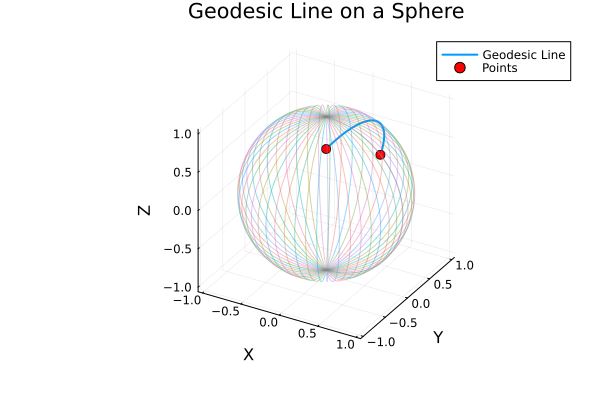

In [7]:
plot(x, y, z, label="Geodesic Line", lw=2)
scatter!([point1[1], point2[1]], [point1[2], point2[2]], [point1[3], point2[3]], label="Points", color=:red, ms=5)
plot!(title="Geodesic Line on a Sphere", xlabel="X", ylabel="Y", zlabel="Z")

# Для отображения сферы добавим ее поверхность
θ = LinRange(0, π, 50)
ϕ = LinRange(0, 2π, 50)
X = [sin(θ[i]) * cos(ϕ[j]) for i in 1:length(θ), j in 1:length(ϕ)]
Y = [sin(θ[i]) * sin(ϕ[j]) for i in 1:length(θ), j in 1:length(ϕ)]
Z = [cos(θ[i]) for i in 1:length(θ), j in 1:length(ϕ)]

plot!(X, Y, Z, alpha=0.4, label="")

In [8]:
# Вычисление углового расстояния между двумя точками
dot_product = dot(point1, point2)
angular_distance = acos(dot_product)

# Длина дуги на сфере радиуса r
arc_length = r * angular_distance

println("Length of the geodesic arc: $arc_length")

Length of the geodesic arc: 1.932163450701605
